In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

In [17]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [19]:
from sklearn.metrics import precision_score,confusion_matrix
from sklearn import tree

In [20]:
data=pd.read_csv("water_potability.csv")
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [21]:
data.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [23]:
yeni=pd.DataFrame(data["Potability"].value_counts())

In [24]:
yeni

count
Potability       
0            1998
1            1278

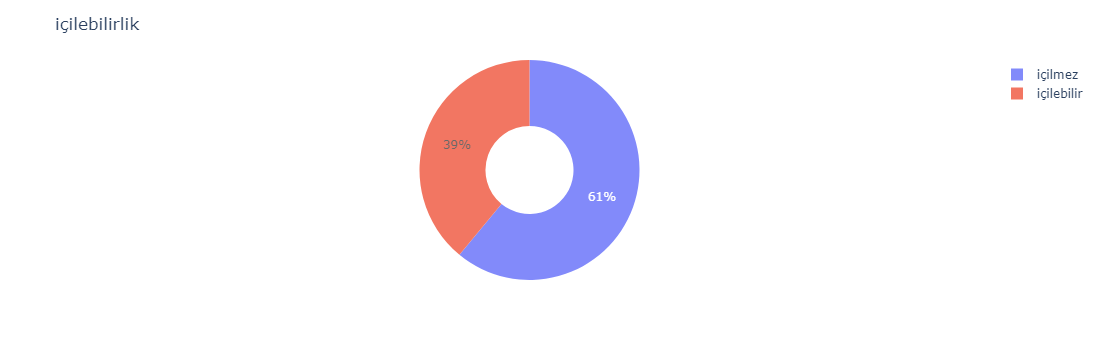

In [27]:
fig = px.pie(yeni, values="count", names=["içilmez", "içilebilir"], hole=0.4, opacity=0.8,
             labels={"label": "Potability", "count": "numune sayısı"})
fig.update_layout(title=dict(text="içilebilirlik"))
fig.show()

In [28]:
data.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   
Potability      -0.003556 -0.013837  0.033743     0.023779 -0.023577   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.018614        0.043503         0.003354  -0.039057   
Hardness            -0.023915        0.003610        -0.013013  -0.014449   
Solids               0.013831        0.010242        -0.009143   0.019546   
Chloramines         -0.020486       -0.012653         0.017084   0.002363   
Sulfate             -0.016121        0.030831        -0.030274  -0.011187   
Conductivity         1.000000        0.020966         0.001285   0.005798   
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308   
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145   
Turbidity            0.005798       -0.027308        -0.022145   1.000000   
Potability          -0.008128       -0.030001         0.007130   0.001581   

                 Potability  
ph                -0.003556  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.023577  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.007130  
Turbidity          0.001581  
Potability         1.000000

[]

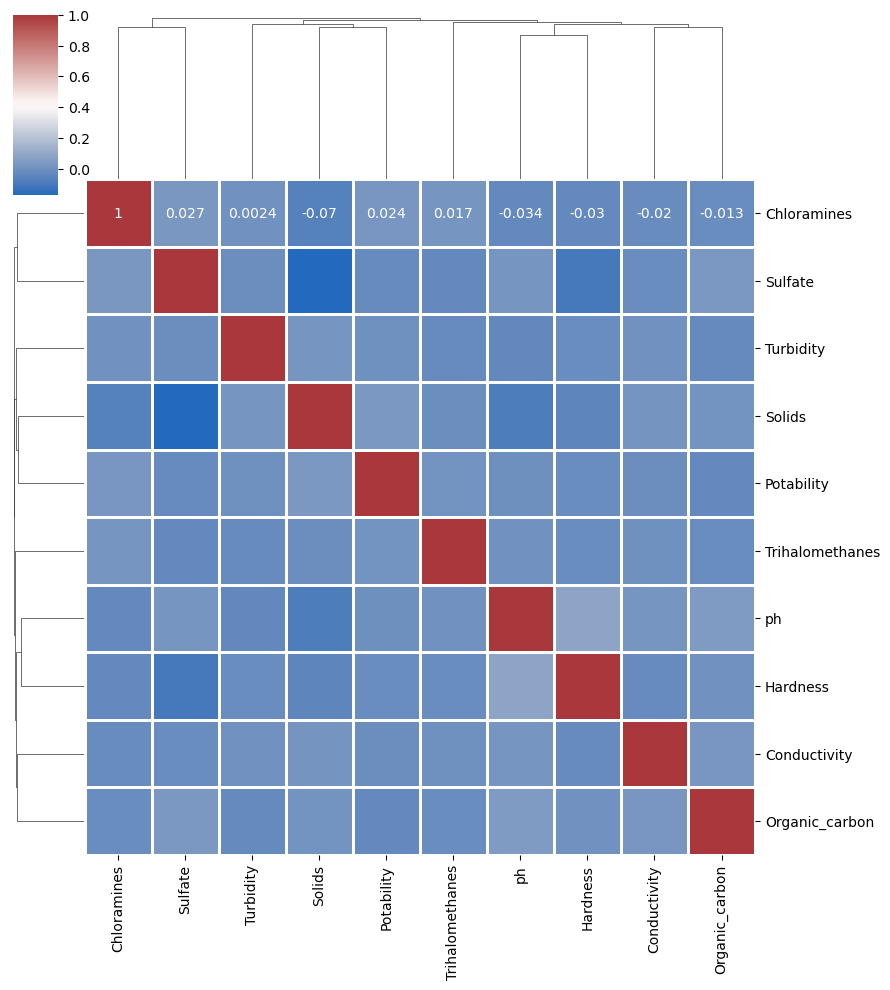

In [29]:
sns.clustermap(data.corr(),cmap="vlag",dendrogram_ratio=(0.1,0.2),annot=True,linewidths=.8,figsize=(9,10))
plt.plot()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

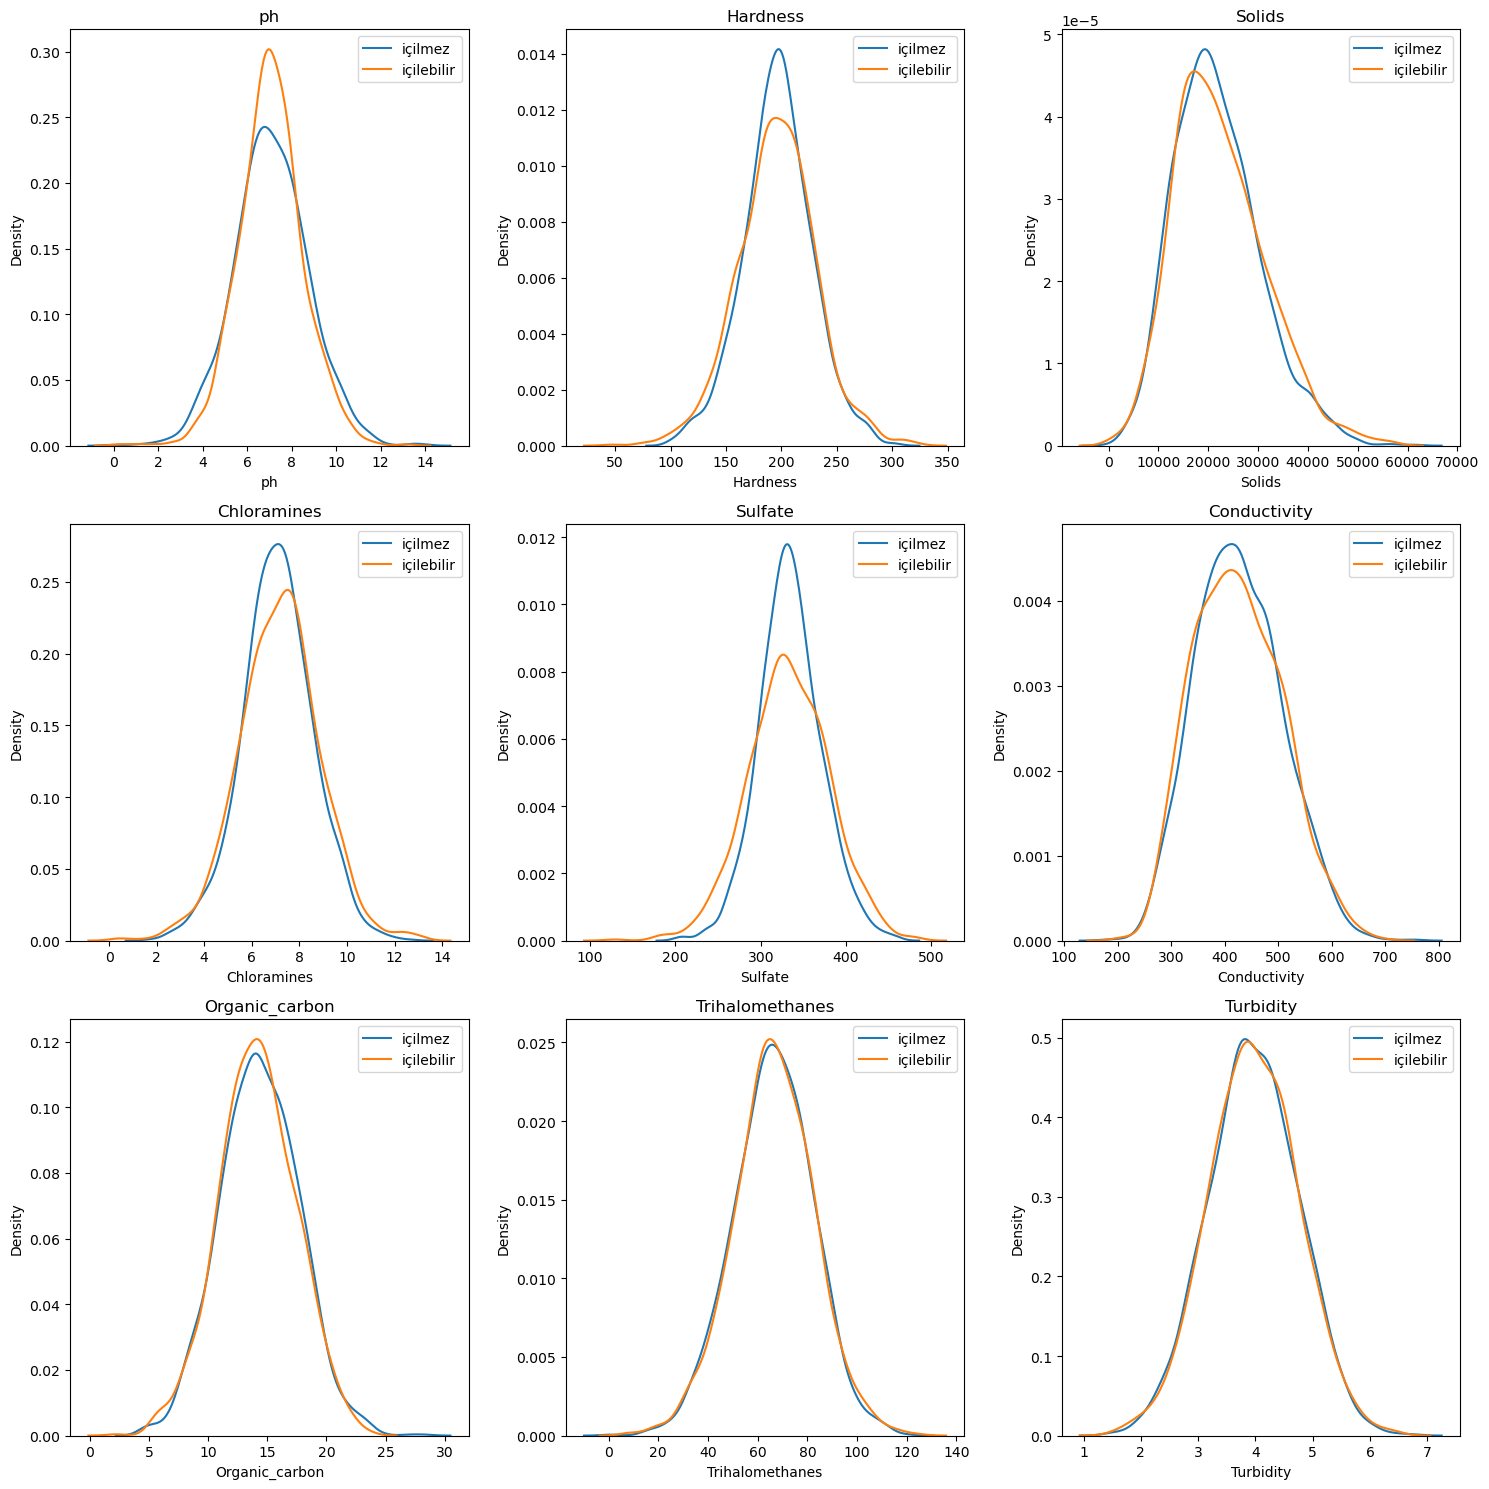

In [30]:
non_potable=data.query("Potability==0")
potable=data.query("Potability==1")
plt.figure(figsize=(15,15))
for ax,col in enumerate(data.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col],label="içilmez")
    sns.kdeplot(x=potable[col],label="içilebilir")
    plt.legend()
plt.tight_layout()

<Axes: >

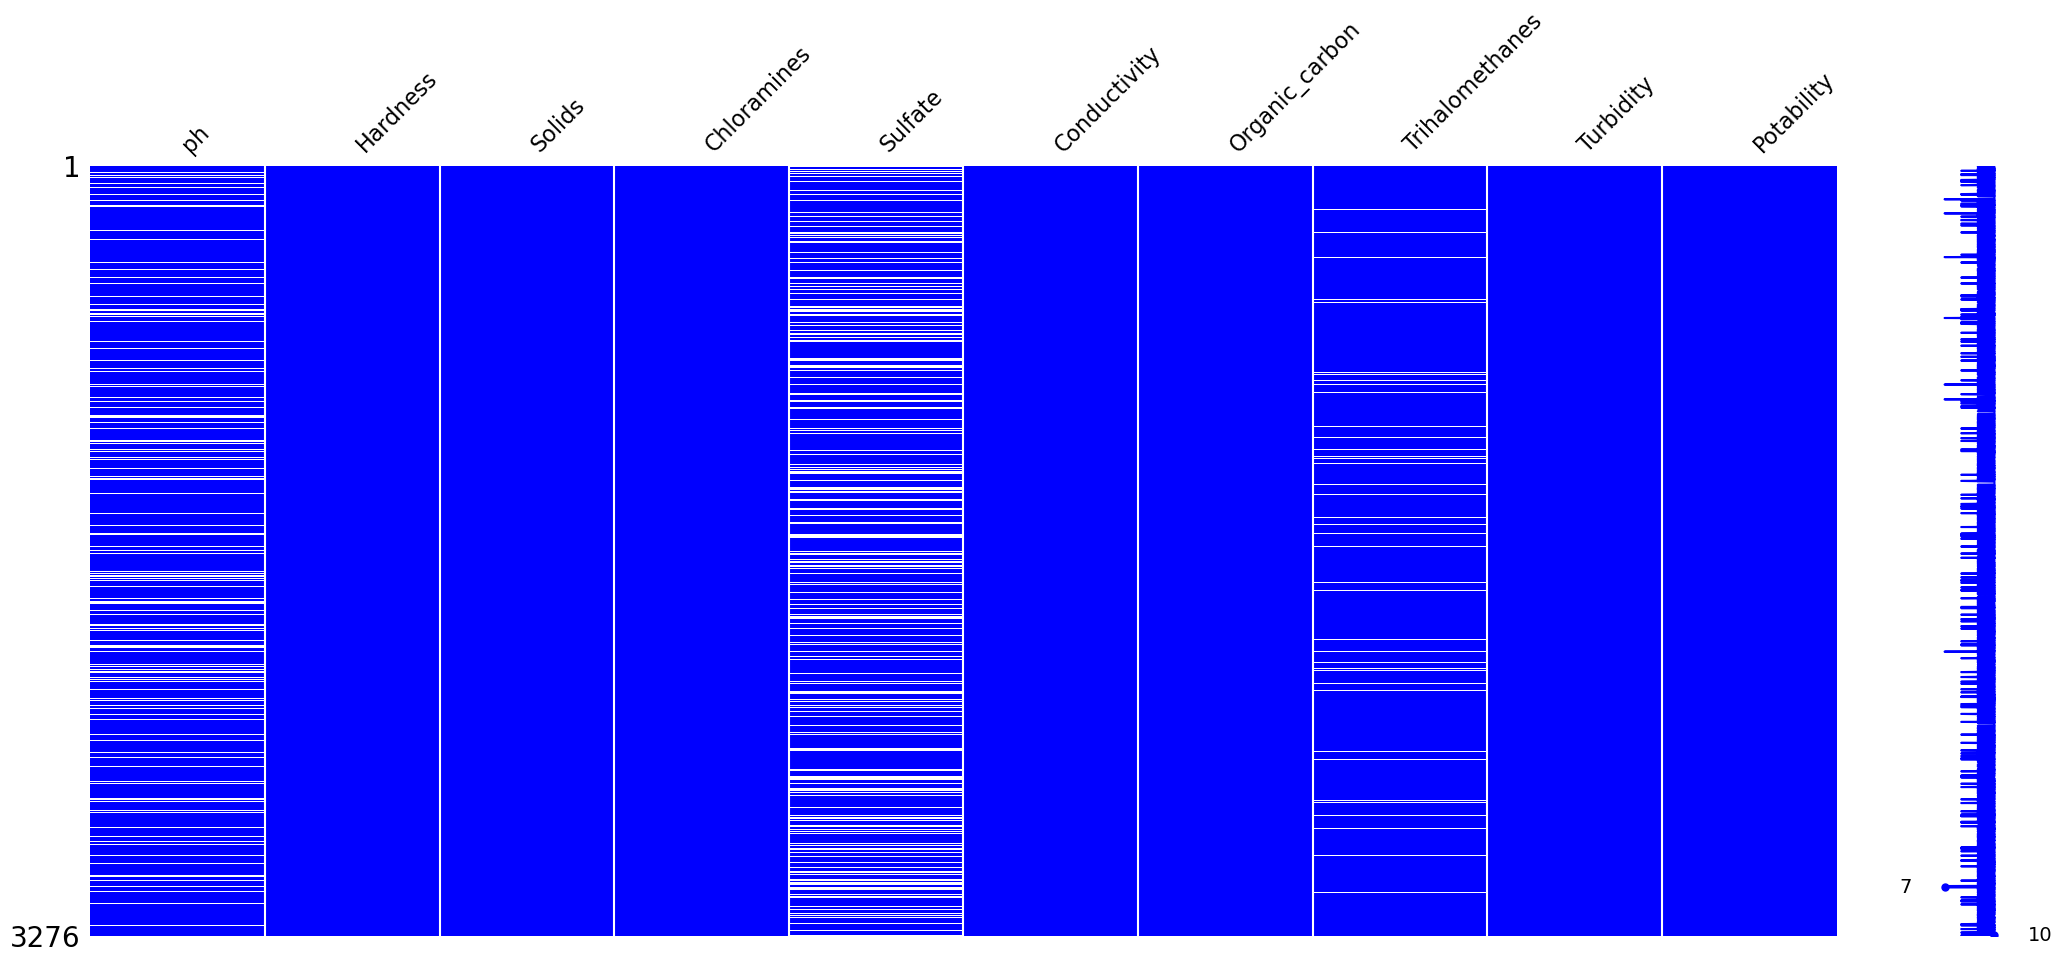

In [31]:
msno.matrix(data,color=(0,0,1))

In [32]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [34]:
data["ph"].fillna(value=data["ph"].mean(),inplace=True)
data["Sulfate"].fillna(value=data["Sulfate"].mean(),inplace=True)
data["Trihalomethanes"].fillna(value=data["Trihalomethanes"].mean(),inplace=True)

In [35]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [36]:
x=data.drop("Potability",axis=1).values
y=data["Potability"].values

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=33)
xtrain.shape

(2293, 9)

In [38]:
xtest.shape

(983, 9)

In [39]:
xtrainmax=np.max(xtrain)
xtrainmin=np.min(xtrain)
xtrain=(xtrain-xtrainmin)/(xtrainmax-xtrainmin)
xtest=(xtest-xtrainmin)/(xtrainmax-xtrainmin)

In [40]:
xtrain

array([[1.14676088e-04, 3.68056212e-03, 3.77444269e-01, ...,
        2.23268413e-04, 1.26316283e-03, 6.00314598e-05],
       [7.62422909e-05, 3.16332852e-03, 7.77121846e-01, ...,
        2.26932138e-04, 1.08918420e-03, 7.24485392e-05],
       [1.35500964e-04, 3.23707542e-03, 2.85314385e-01, ...,
        2.94413256e-04, 7.19641402e-04, 8.82093439e-05],
       ...,
       [1.22618310e-04, 2.81744114e-03, 2.99355468e-01, ...,
        1.74403789e-04, 1.12453616e-03, 6.04796771e-05],
       [1.28958529e-04, 2.75570430e-03, 4.69131685e-01, ...,
        1.95873290e-04, 1.30433136e-03, 7.17284414e-05],
       [1.18579980e-04, 3.17257289e-03, 1.32736297e-01, ...,
        2.61403797e-04, 1.06201107e-03, 6.99413828e-05]])

In [41]:
models=[("DTC",DecisionTreeClassifier(max_depth=3)),
        ("RF",RandomForestClassifier())]

In [43]:
sonuc=[]
cmlist=[]
for name,model in models:
    model.fit(xtrain,ytrain)
    model_result=model.predict(xtest)
    score=precision_score(ytest,model_result)
    cm=confusion_matrix(ytest,model_result)
    sonuc.append((name,score))
    cmlist.append((name,cm))
sonuc

[('DTC', 0.6097560975609756), ('RF', 0.6036866359447005)]

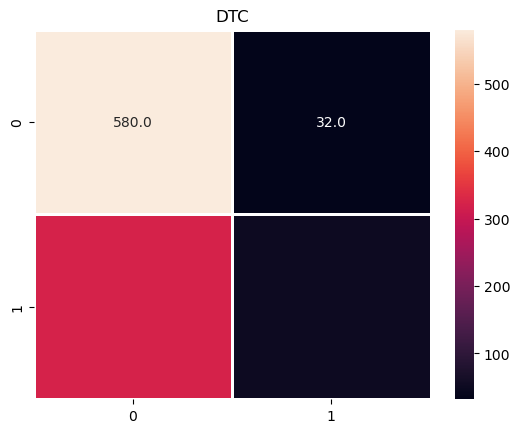

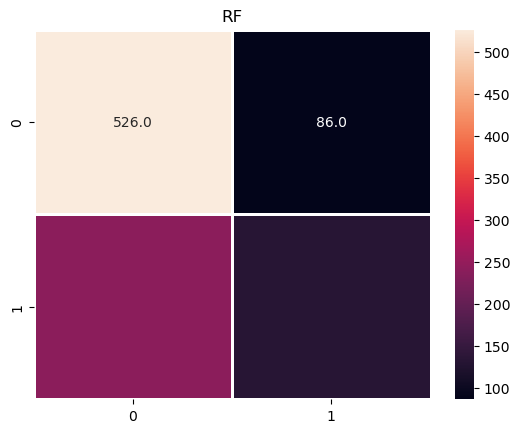

In [44]:
for name,i in cmlist:
    plt.figure()
    sns.heatmap(i,annot=True,linewidths=0.8,fmt=".1f")
    plt.title(name)
    plt.show()

In [45]:
yeni1=models[0][1]

In [46]:
yeni1

DecisionTreeClassifier(max_depth=3)

In [47]:
data.columns.tolist()[:-1]

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

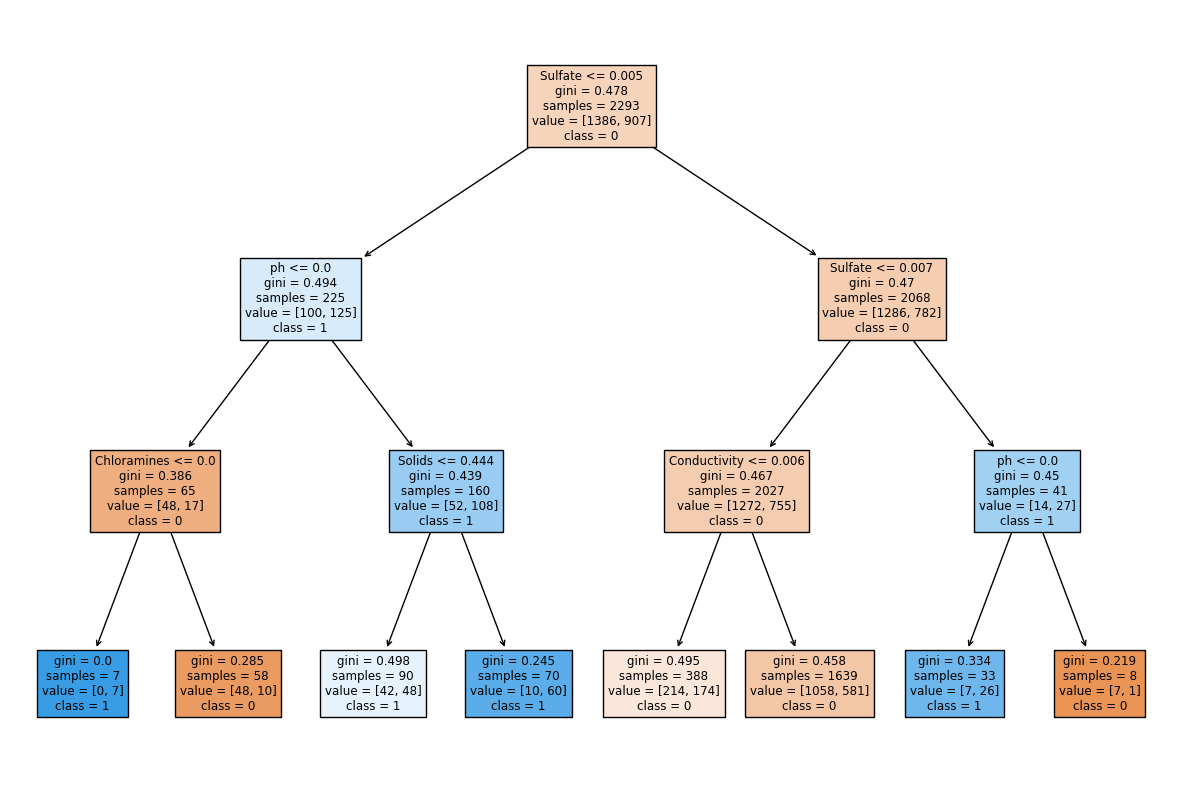

In [48]:
plt.figure(figsize=(15,10))
tree.plot_tree(yeni1,feature_names=data.columns.tolist()[:-1],
               class_names=["0","1"],filled=True)
plt.show()